In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_covid = pd.read_csv("drive/My Drive/ML_projet_covid_panda.csv",sep=";")
df_covid

Dates  Décès_Cum  Dates_Num
0   11/03/2020         48         71
1   12/03/2020         61         72
2   13/03/2020         79         73
3   14/03/2020         91         74
4   15/03/2020        127         75
5   16/03/2020        148         76
6   17/03/2020        175         77
7   18/03/2020        264         78
8   19/03/2020        372         79
9   20/03/2020        450         80
10  21/03/2020        562         81
11  22/03/2020        674         82
12  23/03/2020        860         83
13  24/03/2020       1100         84
14  25/03/2020       1331         85
15  26/03/2020       1696         86
16  27/03/2020       1995         87
17  28/03/2020       2314         88
18  29/03/2020       2606         89
19  30/03/2020       3024         90
20  31/03/2020       3523         91

In [ ]:
df_covid.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

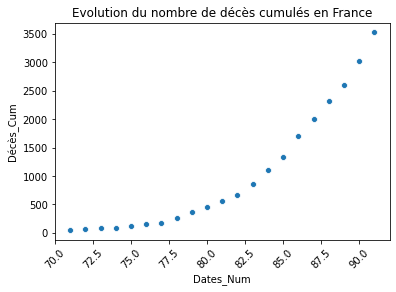

In [ ]:

'''plt.figure(figsize=(5,4), dpi=100)
plt.title('Evolution du nombre de décès cumulés en France')

sns.relplot(x='Dates_Num', y='Décès_Cum', data=df_covid,)
sns.set_style('darkgrid')'''

sns.scatterplot(x = "Dates_Num", y = "Décès_Cum", data = df_covid ) 

plt.tick_params(axis = 'x', rotation = 45)
plt.title('Evolution du nombre de décès cumulés en France')
plt.show()

In [ ]:

Xaxis = df_covid['Dates_Num'] 

Yaxis = df_covid['Décès_Cum']

In [ ]:
model_covid_LRS = np.polyfit(x = Xaxis, y = Yaxis, deg = 1)


print("What's the type of this model ?, ", type(model_covid_LRS))
print("What's inside ?, ", model_covid_LRS)
print("\nHow can I read it ? \nDo you know linear function equation : f(x) = ax + b ? That's it !")
print(round(model_covid_LRS[0], 1) ," * x  +  ", round(model_covid_LRS[1], 1) )

What's the type of this model ?,  <class 'numpy.ndarray'>
What's inside ?,  [   161.65454545 -12070.20865801]

How can I read it ? 
Do you know linear function equation : f(x) = ax + b ? That's it !
161.7  * x  +   -12070.2


NameError: ignored

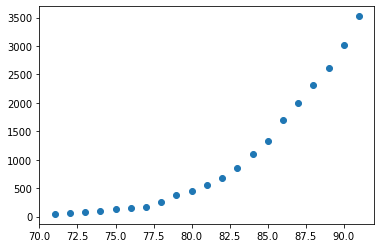

In [ ]:


plt.scatter(x='Dates_Num', y='Décès_Cum', data=df_covid)
plt.plot(array, np.poly1d(model)(array), c='red')
plt.show()

In [ ]:

print("NumPy :  ", np.poly1d(model_covid_LRS)(132)   )

# And NumPy can calculate the prediction on multiple values, let's try with a list of values :
listtest = [132]  # 132 = 11 mai =  fin du confinement
print("NumPy list of values :  ", np.poly1d(model_covid_LRS)(listtest)   )

NumPy :   9268.191341991334
NumPy list of values :   [9268.19134199]


In [ ]:
# donc c'est de la merde vu qu'au 11 mai avec confinement on est à 26 000 mort
# ce qui est logique vu qu'on approxime une courbe presque exponnentielle avec une droite affine...

In [ ]:
#Donc  prédiction avec modele polynomial degre 3 (car R2 de 0,999 cf fichier excel)

In [ ]:
polymodel = np.polyfit(x = Xaxis, y = Yaxis, deg = 3)


print("What's the type of this model ?, ", type(polymodel))
print("What's inside ?, ", polymodel)
print("\nHow can I read it ? \nDo you know linear function equation : f(x) = ax + b ? That's it !")
print(round(polymodel[0], 1) ," * x  +  ", round(polymodel[1], 1) )

What's the type of this model ?,  <class 'numpy.ndarray'>
What's inside ?,  [ 3.18823244e-01 -6.52930325e+01  4.44274933e+03 -1.00333681e+05]

How can I read it ? 
Do you know linear function equation : f(x) = ax + b ? That's it !
0.3  * x  +   -65.3


In [ ]:

Xmin = Xaxis.min()
Xmax = Xaxis.max()             


array1 = np.arange(Xmin, Xmax)

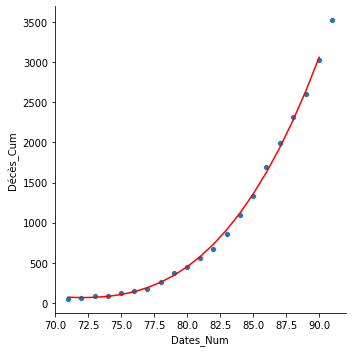

In [ ]:

sns.relplot(x='Dates_Num', y='Décès_Cum', data=df_covid)
plt.plot(array1, np.poly1d(polymodel)(array1), c='red')
plt.show()

In [ ]:

# 91 = 31 mars = début du confinement
# 132 =  11 mai = fin du confinement



# And NumPy can calculate the prediction on multiple values, let's try with a list of values :
listtest = [91,  132]
print("NumPy list of values :  ", np.poly1d(polymodel)(listtest).round(2)   )

NumPy list of values :   [ 3520.86 81726.69]


In [ ]:
df_covid['PREDICTED_dates_values'] = [92,95,100,105,110,115,120,125,130,132,140,145,150,155,160,165,170,175,180,185,190]

In [ ]:
df_covid['PREDICTED_values'] = df_covid['Dates_Num'].apply(lambda x: np.poly1d(polymodel)(x))

print(df_covid)

         Dates  Décès_Cum  Dates_Num  PREDICTED_dates_values  PREDICTED_values
0   11/03/2020         48         71                      92         69.690853
1   12/03/2020         61         72                      95         65.328628
2   13/03/2020         79         73                     100         68.111980
3   14/03/2020         91         74                     105         79.953847
4   15/03/2020        127         75                     110        102.767170
5   16/03/2020        148         76                     115        138.464888
6   17/03/2020        175         77                     120        188.959939
7   18/03/2020        264         78                     125        256.165265
8   19/03/2020        372         79                     130        341.993804
9   20/03/2020        450         80                     132        448.358495
10  21/03/2020        562         81                     140        577.172279
11  22/03/2020        674         82                

In [ ]:
df_covid['PREDICTED_values2'] = df_covid['PREDICTED_dates_values'].apply(lambda x: np.poly1d(polymodel)(x))
print(df_covid)

         Dates  Décès_Cum  ...  PREDICTED_values  PREDICTED_values2
0   11/03/2020         48  ...         69.690853        4022.864662
1   12/03/2020         61  ...         65.328628        5808.966017
2   13/03/2020         79  ...         68.111980        9834.171149
3   14/03/2020         91  ...         79.953847       15377.073316
4   15/03/2020        127  ...        102.767170       22676.789949
5   16/03/2020        148  ...        138.464888       31972.438483
6   17/03/2020        175  ...        188.959939       43503.136349
7   18/03/2020        264  ...        256.165265       57508.000981
8   19/03/2020        372  ...        341.993804       74226.149811
9   20/03/2020        450  ...        448.358495       81726.691224
10  21/03/2020        562  ...        577.172279      116758.769800
11  22/03/2020        674  ...        730.348094      143051.475824
12  23/03/2020        860  ...        909.798880      173013.935778
13  24/03/2020       1100  ...       1117.437576

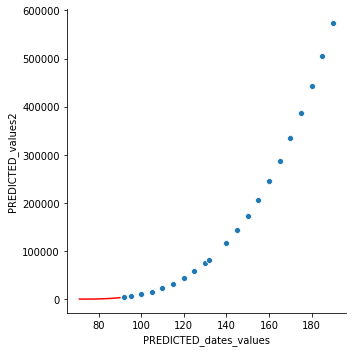

In [ ]:
sns.relplot(x='PREDICTED_dates_values', y='PREDICTED_values2', data=df_covid)
plt.plot(array1, np.poly1d(polymodel)(array1), c='red')
plt.show()

In [ ]:
# ici  132 = 11 mai  =      81726 morts sans confinement
# données réelle avec confinement 26643 morts
# Gain dû au confinement  = 55 083 morts évités.